In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import netCDF4 as nc
import datetime as dt
from salishsea_tools import evaltools as et, places
import xarray as xr
import pandas as pd

%matplotlib inline

#### Example 1: load a time series at one location by accessing netCDF4 files stored on /results or /results2

In [2]:
%%time
start= dt.datetime(2017,3,1)
end=dt.datetime(2017,9,30) # the code called below (evaltools.index_model_files) includes the end date 
                          # in the values returned
basedir='/results/SalishSea/nowcast-green.201812/'
nam_fmt='nowcast'
flen=1 # files contain 1 day of data each
ftype= 'ptrc_T' # load bio files
tres=24 # 1: hourly resolution; 24: daily resolution   <- try changing to 1 and loading hourly data
flist=et.index_model_files(start,end,basedir,nam_fmt,flen,ftype,tres)
# flist contains paths: file pathes; t_0 timestemp of start of each file; t_n: timestamp of start of next file
print(flist)

                                                 paths        t_0        t_n
0    /results/SalishSea/nowcast-green.201812/01mar1... 2017-03-01 2017-03-02
1    /results/SalishSea/nowcast-green.201812/02mar1... 2017-03-02 2017-03-03
2    /results/SalishSea/nowcast-green.201812/03mar1... 2017-03-03 2017-03-04
3    /results/SalishSea/nowcast-green.201812/04mar1... 2017-03-04 2017-03-05
4    /results/SalishSea/nowcast-green.201812/05mar1... 2017-03-05 2017-03-06
..                                                 ...        ...        ...
209  /results/SalishSea/nowcast-green.201812/26sep1... 2017-09-26 2017-09-27
210  /results/SalishSea/nowcast-green.201812/27sep1... 2017-09-27 2017-09-28
211  /results/SalishSea/nowcast-green.201812/28sep1... 2017-09-28 2017-09-29
212  /results/SalishSea/nowcast-green.201812/29sep1... 2017-09-29 2017-09-30
213  /results/SalishSea/nowcast-green.201812/30sep1... 2017-09-30 2017-10-01

[214 rows x 3 columns]
CPU times: user 12 ms, sys: 20 ms, total: 32 ms
Wall

In [3]:
# get model i,j of location S3 from places
ij,ii=places.PLACES['S3']['NEMO grid ji']
ik=0 # choose surface level


In [4]:
bio=xr.open_mfdataset(flist['paths'])

In [5]:
bio

<xarray.Dataset>
Dimensions:                       (axis_nbounds: 2, deptht: 40, nvertex: 4, time_counter: 214, x: 398, y: 898)
Coordinates:
    nav_lat                       (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
    nav_lon                       (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
  * deptht                        (deptht) float32 0.5 1.5 2.5 ... 414.5 441.5
    time_centered                 (time_counter) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter                  (time_counter) datetime64[ns] 2017-03-01T12...
Dimensions without coordinates: axis_nbounds, nvertex, x, y
Data variables:
    bounds_lon                    (time_counter, y, x, nvertex) float32 dask.array<chunksize=(1, 898, 398, 4), meta=np.ndarray>
    bounds_lat                    (time_counter, y, x, nvertex) float32 dask.array<chunksize=(1, 898, 398, 4), meta=np.ndarray>
    area                          (time_counter, y, x) float32 dask.array<chunksize=(1, 898, 398), meta=np.ndarray>
    deptht_bounds                 (time_counter, deptht, axis_nbounds) float32 dask.array<chunksize=(1, 40, 2), meta=np.ndarray>
    nitrate                       (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    time_centered_bounds          (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds           (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    ammonium                      (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    silicon                       (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    diatoms                       (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    flagellates                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    ciliates                      (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    microzooplankton              (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    dissolved_organic_nitrogen    (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    particulate_organic_nitrogen  (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    biogenic_silicon              (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    Fraser_tracer                 (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    mesozooplankton               (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
Attributes:
    name:         SalishSea_1d_20170301_20170310
    description:  biogeochemical variables
    title:        biogeochemical variables
    Conventions:  CF-1.6
    timeStamp:    2019-Jan-11 10:18:36 GMT
    uuid:         8082bc6c-e5cf-46f8-a8ce-8e6f05c20614

In [6]:
%%time
tt=bio.time_centered
micZ=bio.microzooplankton.isel(deptht=ik,y=ij,x=ii)
diat=bio.diatoms.isel(deptht=ik,y=ij,x=ii)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 4.58 ms


CPU times: user 1min 8s, sys: 11.2 s, total: 1min 19s
Wall time: 3min 28s


(17226.5, 17439.5)

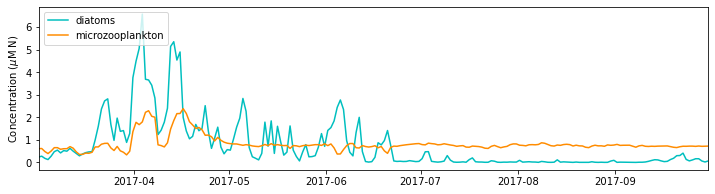

In [7]:
%%time
fig,ax=plt.subplots(1,1,figsize=(12,3))
ax.plot(tt,diat,'c-',label='diatoms')
ax.plot(tt,micZ,'-',color='darkorange',label='microzooplankton')
ax.legend(loc=2);
ax.set_ylabel('Concentration ($\mu$M N)')
ax.set_xlim(tt[0],tt[-1])

In [ ]:
# Adjust date format display
fig,ax=plt.subplots(1,1,figsize=(12,3))
ax.plot(tt,diat,'c-',label='diatoms')
ax.plot(tt,micZ,'-',color='darkorange',label='microzooplankton')
ax.legend(loc=2);
ax.set_ylabel('Concentration ($\mu$M N)')
ax.set_xlim(tt[0],tt[-1])
yearsFmt = mdates.DateFormatter('%d %b')
ax.xaxis.set_major_formatter(yearsFmt)
ax.set_title('March 2017')

In [13]:
bio.close()

### repeat with hourly data over a shorter interval

In [11]:
start= dt.datetime(2017,3,1)
end=dt.datetime(2017,3,5) # the code called below (evaltools.index_model_files) includes the end date 
                          # in the values returned
tres=1 # 1: hourly resolution; 24: daily resolution   <- try changing to 1 and loading hourly data
flist=et.index_model_files(start,end,basedir,nam_fmt,flen,ftype,tres)
# flist contains paths: file pathes; t_0 timestemp of start of each file; t_n: timestamp of start of next file
flist['paths'][0]

'/results/SalishSea/nowcast-green.201812/01mar17/SalishSea_1h_20170301_20170301_ptrc_T.nc'

In [12]:
%%time
bio=xr.open_mfdataset(flist['paths'])
tt=bio.time_centered
micZ=bio.microzooplankton.isel(deptht=0,y=ij,x=ii)
diat=bio.diatoms.isel(deptht=0,y=ij,x=ii)

CPU times: user 188 ms, sys: 16 ms, total: 204 ms
Wall time: 616 ms


CPU times: user 32.7 s, sys: 5.46 s, total: 38.2 s
Wall time: 42.2 s


(17226.020833333332, 17230.979166666668)

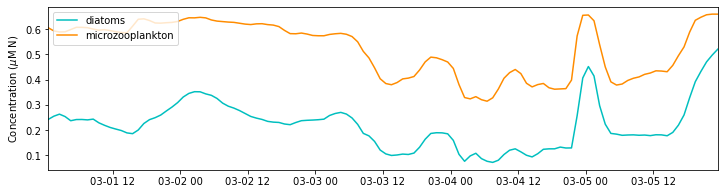

In [13]:
%%time
fig,ax=plt.subplots(1,1,figsize=(12,3))
ax.plot(tt,diat,'c-',label='diatoms')
ax.plot(tt,micZ,'-',color='darkorange',label='microzooplankton')
ax.legend(loc=2);
ax.set_ylabel('Concentration ($\mu$M N)')
ax.set_xlim(tt[0],tt[-1])

In [14]:
bio.close()

### Aside: this can also be done using ERDDAP, but only to access 201905 model output

In [15]:
%%time
hc1905 = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSg3DBiologyFields1hV19-05')

CPU times: user 24 ms, sys: 4 ms, total: 28 ms
Wall time: 57.4 ms


In [16]:
%%time
hc1905

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 4.53 µs


<xarray.Dataset>
Dimensions:                       (depth: 40, gridX: 398, gridY: 898, time: 123216)
Coordinates:
  * time                          (time) datetime64[ns] 2007-01-01T00:30:00 ....
  * depth                         (depth) float32 0.5 1.5 2.5 ... 414.5 441.5
  * gridY                         (gridY) int16 0 1 2 3 4 ... 894 895 896 897
  * gridX                         (gridX) int16 0 1 2 3 4 ... 394 395 396 397
Data variables:
    ammonium                      (time, depth, gridY, gridX) float32 ...
    biogenic_silicon              (time, depth, gridY, gridX) float32 ...
    ciliates                      (time, depth, gridY, gridX) float32 ...
    diatoms                       (time, depth, gridY, gridX) float32 ...
    dissolved_organic_nitrogen    (time, depth, gridY, gridX) float32 ...
    flagellates                   (time, depth, gridY, gridX) float32 ...
    mesozooplankton               (time, depth, gridY, gridX) float32 ...
    microzooplankton              (time, depth, gridY, gridX) float32 ...
    nitrate                       (time, depth, gridY, gridX) float32 ...
    particulate_organic_nitrogen  (time, depth, gridY, gridX) float32 ...
    silicon                       (time, depth, gridY, gridX) float32 ...
Attributes:
    acknowledgement:           MEOPAR, ONC, Compute Canada
    cdm_data_type:             Grid
    comment:                   If you use this dataset in your research,\nple...
    Conventions:               CF-1.6, COARDS, ACDD-1.3
    creator_email:             sallen@eoas.ubc.ca
    creator_name:              Salish Sea MEOPAR Project Contributors
    creator_url:               https://salishsea-meopar-docs.readthedocs.io/
    description:               biogeochemical variables
    drawLandMask:              over
    history:                   2021-01-21T19:06:06Z (local files)\n2021-01-21...
    infoUrl:                   https://salishsea-meopar-docs.readthedocs.io/e...
    institution:               UBC EOAS
    institution_fullname:      Earth, Ocean & Atmospheric Sciences, Universit...
    keywords:                  ammonia, ammonium, aquatic, biogenic, biogenic...
    keywords_vocabulary:       GCMD Science Keywords
    license:                   The Salish Sea MEOPAR NEMO model results are c...
    project:                   Salish Sea MEOPAR NEMO Model
    sourceUrl:                 (local files)
    standard_name_vocabulary:  CF Standard Name Table v29
    summary:                   Green, Salish Sea, 3d Biology Fields, Hourly, ...
    testOutOfDate:             now-16hours
    time_coverage_end:         2021-01-20T23:30:00Z
    time_coverage_start:       2007-01-01T00:30:00Z
    timeStamp:                 2021-Jan-20 19:28:54 GMT
    title:                     Green, Salish Sea, 3d Biology Fields, Hourly, ...
    uuid:                      541bbc8f-d5b3-41e7-99b8-be00298750dd

In [17]:
%%time
modt=hc1905.time.sel(time=slice(start,end))
micZ1905=hc1905.microzooplankton.sel(time=slice(start,end)).isel(depth=ik,gridY=ij,gridX=ii)
diat1905=hc1905.diatoms.sel(time=slice(start,end)).isel(depth=ik,gridY=ij,gridX=ii)

CPU times: user 4 ms, sys: 4 ms, total: 8 ms
Wall time: 7.84 ms


CPU times: user 28 ms, sys: 0 ns, total: 28 ms
Wall time: 58.8 s


(17226.020833333332, 17229.979166666668)

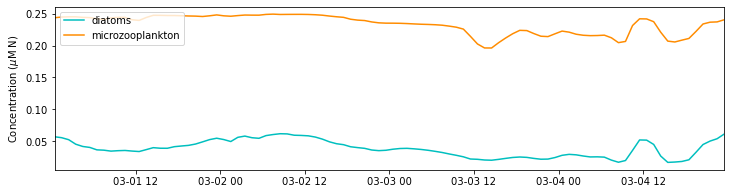

In [18]:
%%time
fig,ax=plt.subplots(1,1,figsize=(12,3))
ax.plot(modt,diat1905,'c-',label='diatoms')
ax.plot(modt,micZ1905,'-',color='darkorange',label='microzooplankton')
ax.legend(loc=2);
ax.set_ylabel('Concentration ($\mu$M N)')
ax.set_xlim(modt[0],modt[-1]);

In [19]:
hc1905.close()

## back to accessing files from /results and /results2, but now switch to loading 201905 results

In [20]:
basedir='/results2/SalishSea/nowcast-green.201905/'

## Plot mid Feb -- Jun Surface phytoplankton and nitrate at S3 for 2017:

In [21]:
newstart=dt.datetime(2017,2,15)
newend=dt.datetime(2017,6,1)
flist=et.index_model_files(newstart,newend,basedir,'nowcast',1,'ptrc_T',1)
bio2=xr.open_mfdataset(flist['paths'])
ij,ii=places.PLACES['S3']['NEMO grid ji']
ik=0 # choose surface level

KeyboardInterrupt: 

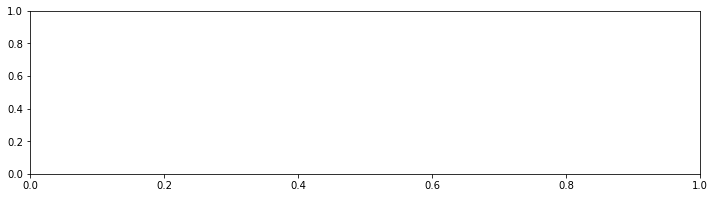

In [22]:
%%time
fig,ax=plt.subplots(1,1,figsize=(12,3))
p1=ax.plot(bio2.time_centered,bio2.diatoms.isel(deptht=ik,y=ij,x=ii)+\
        bio2.flagellates.isel(deptht=ik,y=ij,x=ii)+bio2.ciliates.isel(deptht=ik,y=ij,x=ii),
           '-',color='teal',label='Phytoplankton')
p2=ax.plot(bio2.time_centered,bio2.nitrate.isel(deptht=ik,y=ij,x=ii),
           '-',color='orange',label='Nitrate')
ax.legend(handles=[p1[0],p2[0]],loc=1)
ax.set_ylabel('$\mu$M N')

## Fraser River flow for same times

In [23]:
dfFra=pd.read_csv('/ocean/eolson/MEOPAR/obs/ECRivers/Flow/FraserHopeDaily__Dec-2-2020_10_31_05PM.csv',
                  skiprows=1)
# the original file contains both flow and water level information in the same field (Value)
# keep only the flow data, where PARAM=1 (drop PARAM=2 values)
# flow units are m3/s
dfFra.drop(dfFra.loc[dfFra.PARAM==2].index,inplace=True)  

In [25]:
# rename 'Value' column to 'Flow' now that we have removed all the water level rows
dfFra.rename(columns={'Value':'Flow'},inplace=True)

In [26]:
dfFra

,ID,PARAM,YEAR,DD,Flow,SYM
0,08MF005,1,1912,61,538.0,NaN
1,08MF005,1,1912,62,538.0,NaN
2,08MF005,1,1912,63,538.0,NaN
3,08MF005,1,1912,64,538.0,NaN
4,08MF005,1,1912,65,538.0,NaN
...,...,...,...,...,...,...
39016,08MF005,1,2018,360,1090.0,NaN
39017,08MF005,1,2018,361,1050.0,NaN
39018,08MF005,1,2018,362,1030.0,NaN
39019,08MF005,1,2018,363,1120.0,NaN


In [27]:
# no time information so use dt.date
dfFra['Date']=[dt.date(iyr,1,1)+dt.timedelta(days=idd-1) for iyr, idd in zip(dfFra['YEAR'],dfFra['DD'])]

In [28]:
dfFra.head(2)

,ID,PARAM,YEAR,DD,Flow,SYM,Date
0,08MF005,1,1912,61,538.0,NaN,1912-03-01
1,08MF005,1,1912,62,538.0,NaN,1912-03-02


In [29]:
# select portion of dataframe in desired date range
dfFra2=dfFra.loc[(dfFra.Date>=newstart.date())&(dfFra.Date<=newend.date())]

Text(0.5, 1.0, 'Fraser Flow at Hope')

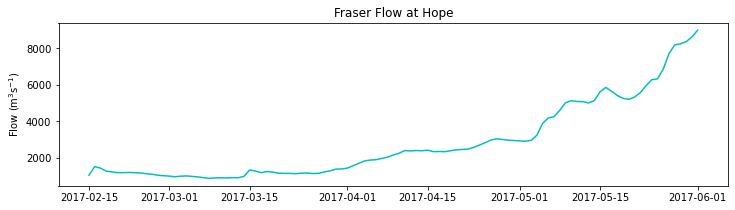

In [33]:
fig,ax=plt.subplots(1,1,figsize=(12,3))
ax.plot(dfFra2['Date'],dfFra2['Flow'],'c-')
ax.set_ylabel('Flow (m$^3$s$^{-1}$)')
ax.set_title('Fraser Flow at Hope')